# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: undergrad 10, graduate students 11

Complete this notebook and submit it. The notebook needs to be a complete project report with 

* your implementation (you can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or search algorithms),
* documentation including a short discussion of how your implementation works and your design choices, and
* experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. 

Use the provided notebook cells and insert additional code and markdown cells as needed.

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random as rd

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

In [ ]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

In [ ]:
board = [1,3,0,2]
show_board(board)

In [ ]:
def expand(i,board):

    moves = [a for a in range(len(board)) if a != i]
    return moves

print(expand(1,board))

## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

Board with 3 conflicts.


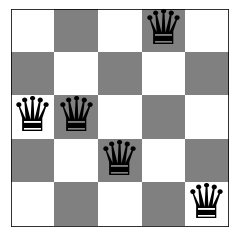

Board with 0 conflicts.


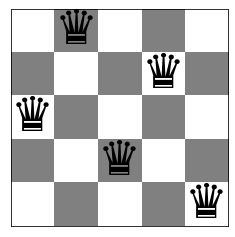

In [272]:
# Code and description go here
'''
THe global minimum at the start would be set to the current board variable.
Also set conflicts(start) as the starting board variable as the current_conflicts variable
For each column in the board, and for each of the nodes in the expansion(given the expand function) in that, calculate the conflicts of each expansion and then pick the one with the minimum.
Do forward iteration and backward iteration and hopefully find the best one which also saves implementation time and space of the implementation

'''
board = random_board(5)
def steepest_hill_climbing(board):
    current = board.copy()
    current_min_conflicts = conflicts(board)
    for column_index in range(len(board)):
        
        column_moves = expand(current[column_index],current)
        for move in column_moves:
            test_move = current.copy()
            test_move[column_index] = move

            if conflicts(test_move) < current_min_conflicts:
                current = test_move
                current_min_conflicts = conflicts(test_move)
    for column_index in range(len(board)):
        column_moves = expand(current[len(board)-column_index-1],current)
        for move in column_moves:
            test_move = current.copy()
            test_move[len(board)-column_index-1] = move
            if conflicts(test_move) < current_min_conflicts:
                current = test_move
                current_min_conflicts = conflicts(test_move)
    return current

show_board(board)

show_board(steepest_hill_climbing(board))









## Stochastic Hill Climbing 1 [2 Point]

Chooses randomly from among all uphill moves. Make the probability of the choice proportional to the steepness of the uphill move (i.e., with the improvement in conflicts). 

In [395]:
# Code and description go here
'''
First I want to iterate through all of the columns, on each column calculate all of the potential boards with all of their conflicts, put this in a list in order to choose one pbased on the probability function
The list of moves will consist of an array of the current board arrangement and a list of weights and the weights will determine the probability of a pick

'''
board = random_board(15)


def probability_generator(boards,original_conflicts):
    weights = []
    for indx in range(len(boards)):
        weight = abs(original_conflicts-conflicts(boards[indx]))
        weights.append(weight)
    return weights


def stochastic_hill_climbing(board):
    current = board.copy()
    tries = 0
    while (conflicts(current) > 0 and tries < 1000):
        tries+=1
        current_min_conflicts = conflicts(board)
        for column_index in range(len(board)):
            column_moves = expand(current[column_index],current)
            moves_list = []

            for move in column_moves:
                row_move = current.copy()
                row_move[column_index] = move
                if conflicts(row_move)<current_min_conflicts: #Don't even consider a move that is worse, it will mess up the weights and then make it so that sometimes we randomly make it worse
                    moves_list.append(row_move.copy())

            if moves_list:
                weights = probability_generator(moves_list,current_min_conflicts)
                gen_move = rd.choices(moves_list,weights,k=1)
                current[column_index] = gen_move[0][column_index]
    
        
        

    
    return current

avg_conflicts_steepest = 0
avg_conflicts_stochastic = 0
for i in range(100):
    board = random_board(5)
    avg_conflicts_steepest = conflicts(steepest_hill_climbing(board))+avg_conflicts_steepest
    avg_conflicts_stochastic = conflicts(stochastic_hill_climbing(board))+avg_conflicts_stochastic
print(avg_conflicts_stochastic/100)
print(avg_conflicts_steepest/100)


0.02
0.4


## Stochastic Hill Climbing 2 [2 Point]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Board with 6 conflicts.


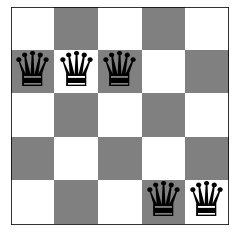

Board with 0 conflicts.


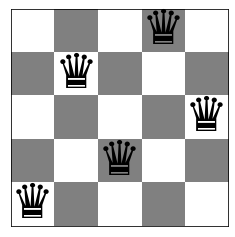

In [396]:
# Code and description go her
'''
Basically just gather a single random and if it decreases number of conflicts from the original board then we use that version of the board
'''
def random_local_neighbor(board):
    tries = 0

    current = board.copy()
    while(conflicts(current) > 0 and tries < 1000):
        tries+=1
        local_minimum = conflicts(board)
        for column_index in range(len(board)):
            column_moves = expand(current[column_index],current)
            move_choice = rd.choice(column_moves)
            test_board = current.copy()
            test_board[column_index] = move_choice
            if conflicts(test_board) < local_minimum:
                local_minimum = conflicts(test_board)
                current = test_board
    
    return current

board = random_board(5)
show_board(board)

show_board(random_local_neighbor(board))

## Hill Climbing Search with Random Restarts [1 Point]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times with a new random initialization.

In [399]:
# Code and description go here
def random_restart(N,algorithm):
    board = random_board(N)
    current = board.copy()
    tries = 0
    complete = False
    min_board = current
    while tries < 100:
        tries+=1
        if complete is False:
            current = algorithm(current)
            if conflicts(current) < conflicts(min_board):
                min_board = current

        if conflicts(min_board) == 0:
            return min_board
        if complete is True:
            break 
        current = random_board(N) 
    
    return min_board

steepest_test = random_restart(10,steepest_hill_climbing)
print(conflicts(steepest_test))
    

0


## Compare Performance [2 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size?

* What is the largest board each algorithm can solve in a reasonable amount time?

The example below times creating 100 random boards and calculating the conflicts. Reported is the average run time over `N = 100` runs.

For timing you can use the `time` package.

In [368]:
import time

N = 100
total = 0

for i in range(N):
    t0 = time.time()
    for i in range(1,100): conflicts(random_board(8))
    t1 = time.time()
    total += t1 - t0

tm = total/N
    
print(f"This took: {tm * 1e3} milliseconds")

This took: 2.284111976623535 milliseconds


The `timit` package is useful to measure time for code that is called repeatedly.

In [ ]:
import timeit

N = 100

tm = timeit.timeit('for i in range(1,100): conflicts(random_board(8))', 
                   globals = globals(), number = N)/N

print(f"This took: {tm * 1e3} milliseconds")

In [ ]:
# Code, results, charts and discussion go here

## Graduate student advanced task: Simulated Annealing [1 Point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+1 Bonus point].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


Implement simulated annealing for the n-Queens problem and compare its performance with the previouse algorithms.

In [ ]:
# Code and description go here

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [ ]:
# Code and description go here